In [1]:
import sys
sys.path.append('../')

from envs.GridMaps import *
from utilities.transitionDatasetGeneration import *

In [2]:
#En los resultados de la memoria se presentan 2 distribuciones de casillas no demostradas para cada mapa. Para cada una de
#ellas se ha tenido que entrenar 1 ensemble. En el caso del grid de 5x5, se pueden encontrar los 2 ensembles en las 
#carpetas '5x5_5_model' y '5x5_5_modelv2' mientras que para el 14x14 en '5_model' y '5_modelv2'.

shape = "14x14"                     #Tamanho del grid '5x5' o '14x14'

if shape == "5x5":
    maze = maze5x5["maze"]          #Nombre del mapa con el que se entreno el ensemble
    folder_name = '5x5_5_model'     #Carpeta desde la que se cargan los modelos
    hidden_size = 32                #Tamanho de las capas ocultas de los modelos a cargar
elif shape == "14x14":
    maze = maze14x14["maze"]        #Nombre del mapa con el que se entreno el ensemble
    folder_name = '5_model'         #Carpeta desde la que se cargan los modelos
    hidden_size = 512               #Tamanho de las capas ocultas de los modelos a cargar

In [3]:
#plot_train_losses(folder_name)
#plot_val_losses(folder_name)

In [4]:
models_arr = load_models(folder_name, hidden_size=hidden_size)

Loading models from folder: ../data/OfflineEnsembles/5_modelv2/
Loading model: model_0.pt
Loading model: model_1.pt
Loading model: model_2.pt
Loading model: model_3.pt
Loading model: model_4.pt


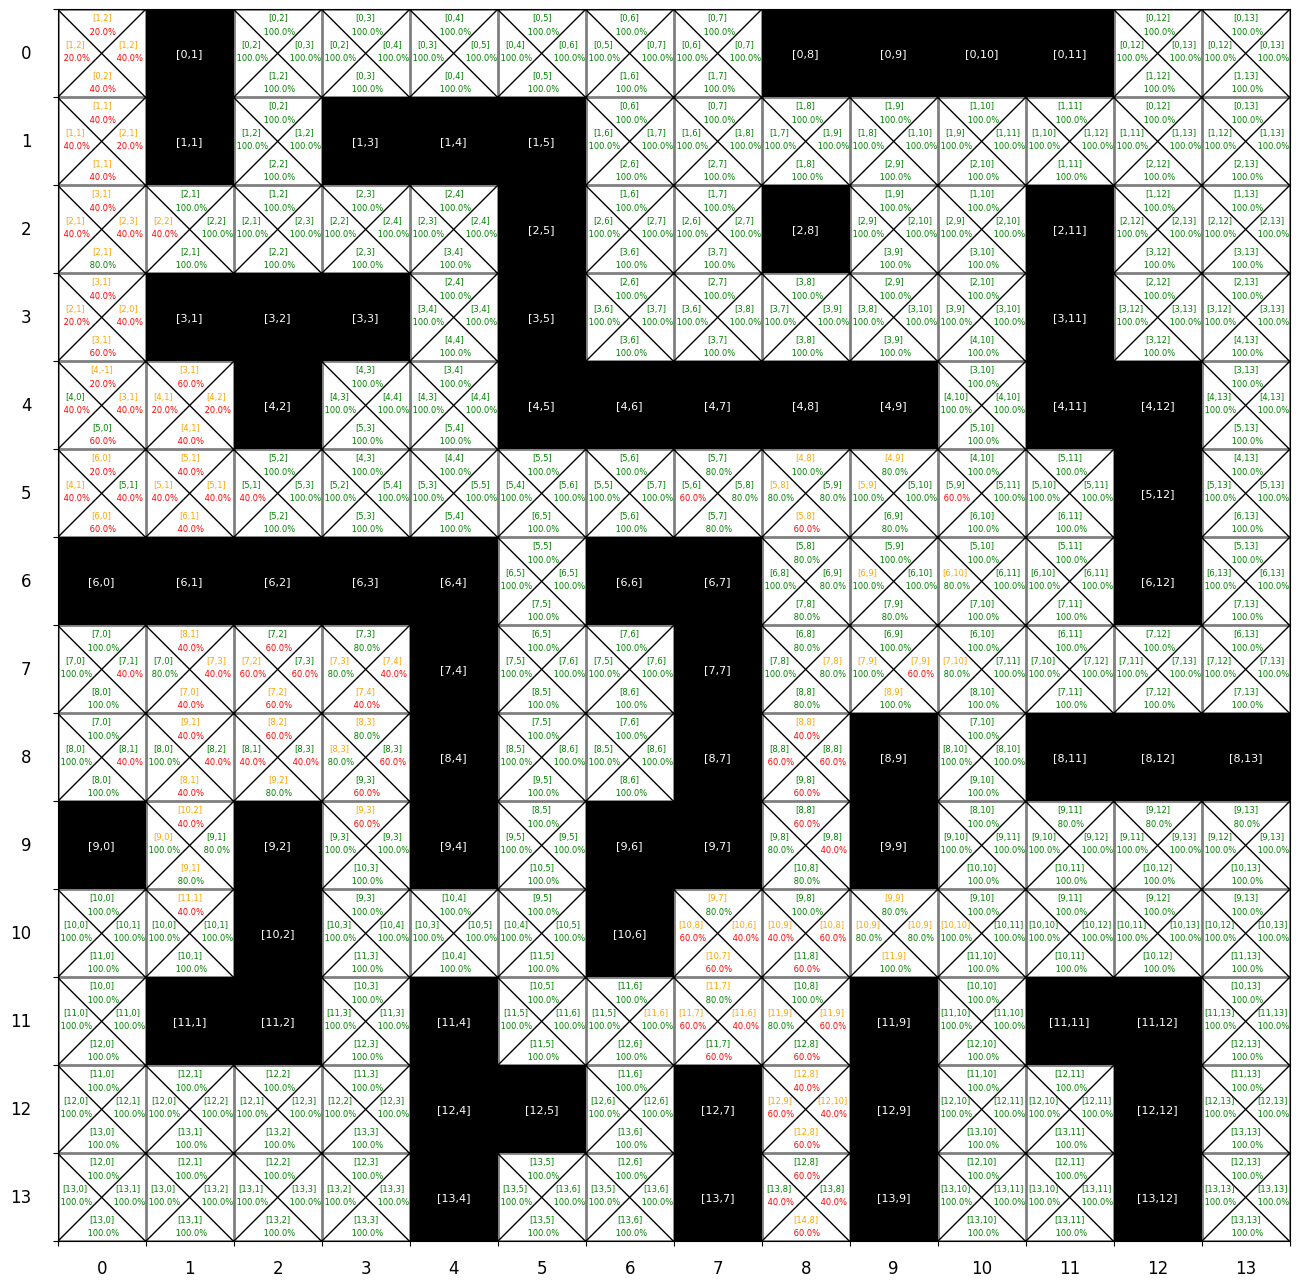

In [5]:
#Esta función muestra la coincidencia en el polling, i.e. para el resultado más abundante
#entre las predicciones de las redes para cada [y,x,a], que porcentaje de los modelos ha
#hecho esa predicción
#Tambien se muestra el valor [y,x] de la predicción, en verde si se corresponde con el mapa
#y en naranja si es erróneo

probMapper(maze, models_arr, threshold=80.0)

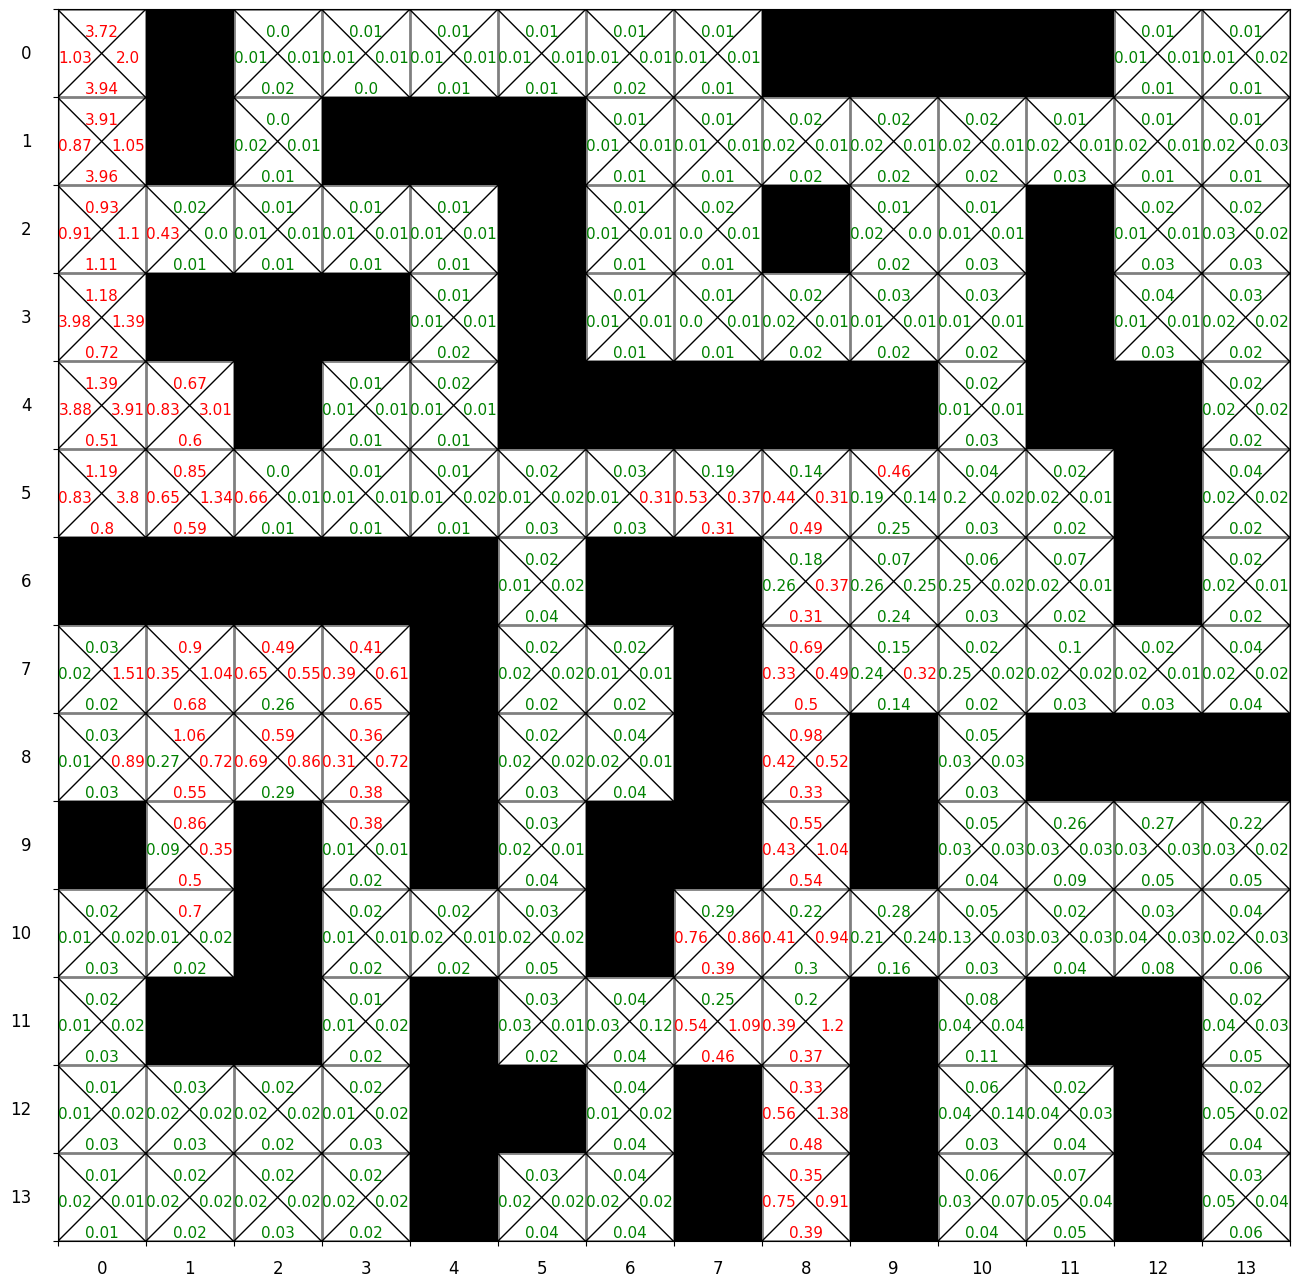

In [6]:
stdMapper(maze, models_arr, threshold=0.3)

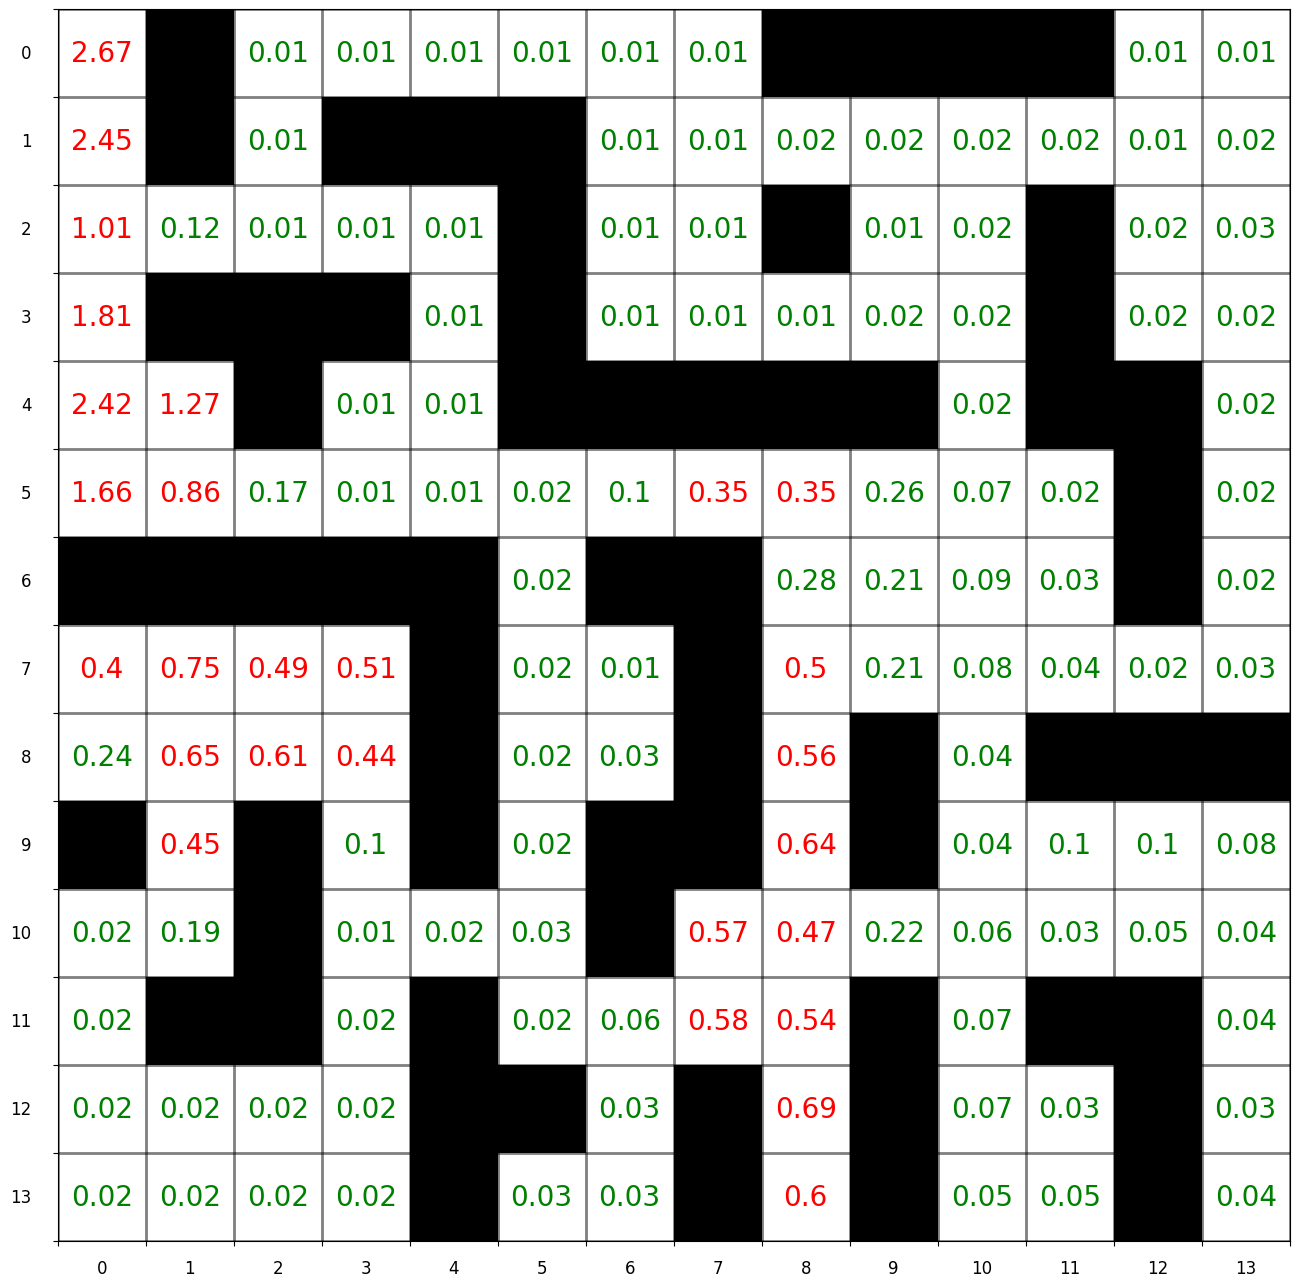

In [7]:
stdMeanMapper(maze, models_arr, threshold=0.3)